Multi  Class

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim


from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
num_samples = 300
num_features = 2
num_classes = 3

X, y = make_blobs(n_samples= 300, centers = 3,
                  n_features = 2, cluster_std =2, random_state=42)



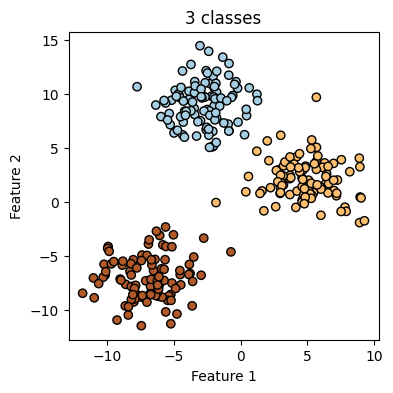

In [7]:
# הצגת הנתונים בגרף
plt.figure(figsize = (4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("3 classes")
plt.show()


In [8]:
X_tensor = torch.tensor(X,dtype =torch.float32)
y_tensor = torch.tensor(y,dtype =torch.int64)

In [9]:
X.shape[1]

2

In [12]:
y.shape # לא רלוונטי בוחרים לפי מספר סוגי תויות

(300,)

In [23]:
model = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,3)
    )

In [15]:
x = torch.tensor([1.2,3.,4.])

In [14]:
x.argmax()

tensor(2)

In [16]:
x.softmax(dim=0)

tensor([0.0426, 0.2575, 0.6999])

In [24]:
#פונקציית הפסד ואופטימיזציה
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [25]:
#אימון
num_epochs = 1000
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = model(X_tensor)
  loss = criterion(outputs, y_tensor)
  loss.backward()
  optimizer.step()
  if epoch%100 ==0:
    print(f"Epoch {epoch} Loss: {loss.item()}")

print (f"Final Loss {loss.item()}")

Epoch 0 Loss: 1.3417000770568848
Epoch 100 Loss: 0.00704589206725359
Epoch 200 Loss: 0.0035622771829366684
Epoch 300 Loss: 0.001729512820020318
Epoch 400 Loss: 0.0008531427592970431
Epoch 500 Loss: 0.0004661880957428366
Epoch 600 Loss: 0.0002827871066983789
Epoch 700 Loss: 0.00018674449529498816
Epoch 800 Loss: 0.000131402732222341
Epoch 900 Loss: 9.693922766018659e-05
Final Loss 7.430960977217183e-05


In [21]:
%run /content/PlotBoudary.ipynb



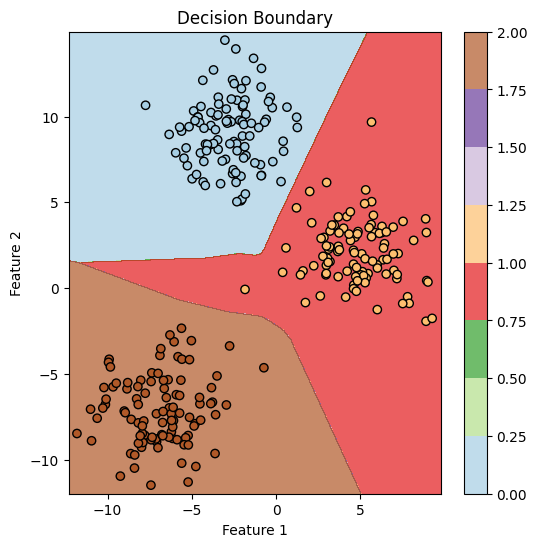

In [26]:
plot_multi_class(X,y,model)

איריס

In [35]:
iris =load_iris()

In [31]:
#iris

In [36]:
X,y = iris.data, iris.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
#נירמול
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)
#טנסורים
X_train_tensor =  torch.tensor(X_train, dtype =torch.float32)
X_test_tensor =  torch.tensor(X_test, dtype =torch.float32)
y_train_tensor = torch.tensor(y_train, dtype =torch.int64)
y_test_tensor = torch.tensor(y_test, dtype =torch.int64)

In [39]:
X.shape[1]

4

In [51]:
model = nn.Sequential (nn.Linear(4,3))

In [52]:
#פונקציית הפסד ואופטימיזציה
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [53]:
#אימון
num_epochs = 1000
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)
  loss.backward()
  optimizer.step()
  if epoch%100 ==0:
    # train_pred = (torch.argmax(outputs, dim=1) == y_train_tensor)
    # train_acc = train_pred.float().mean().item()
    print(f"Epoch {epoch} Loss: {loss.item()}")
    # print(f"Training Accuracy  {train_acc}")
    model.eval()
    with torch.no_grad():
      test_output = model(X_test_tensor)
      preds = torch.argmax(test_output, dim=1)
      final_accuracy= (preds == y_test_tensor).float().mean().item()
      print (f"Accuracy : {final_accuracy}")


Epoch 0 Loss: 2.05068302154541
Accuracy : 0.03333333507180214
Epoch 100 Loss: 0.47077083587646484
Accuracy : 0.8333333134651184
Epoch 200 Loss: 0.34440189599990845
Accuracy : 0.8666666746139526
Epoch 300 Loss: 0.2743881344795227
Accuracy : 0.9333333373069763
Epoch 400 Loss: 0.227921262383461
Accuracy : 0.9666666388511658
Epoch 500 Loss: 0.19539858400821686
Accuracy : 0.9666666388511658
Epoch 600 Loss: 0.171708881855011
Accuracy : 0.9666666388511658
Epoch 700 Loss: 0.15382583439350128
Accuracy : 0.9666666388511658
Epoch 800 Loss: 0.1398981213569641
Accuracy : 0.9666666388511658
Epoch 900 Loss: 0.12876008450984955
Accuracy : 0.9666666388511658


In [46]:
model.eval()
with torch.no_grad():
  test_output = model(X_test_tensor)
  preds = torch.argmax(test_output, dim=1)
  final_accuracy= (preds == y_test_tensor).float().mean().item()
  print (f"Accuracy : {final_accuracy}")


Accuracy : 1.0
